In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
except ValueError:
    strategy = tf.distribute.get_strategy() # for CPU and single GPU
print('Number of replicas:', strategy.num_replicas_in_sync)

Number of replicas: 1


In [ ]:
!nvidia-smi

Sun Dec 26 08:17:37 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train=pd.read_csv('/content/drive/MyDrive/VLSP2021/Data_new/data_aug - data_aug.csv')
test = pd.read_csv('/content/drive/MyDrive/VLSP2021/Data_new/test_gold_4177.csv')
# val_df.to_csv('/content/drive/MyDrive/MNLI_dataset/val_data.csv')

In [ ]:
!cp /content/drive/MyDrive/VLSP2021/vlsp_2021_nli_train_data/train_data.csv /content/drive/MyDrive/VLSP2021/Data_new

In [ ]:
# train.to_csv('/content/drive/MyDrive/VLSP2021/Data_new/train_data.csv')


In [ ]:
train.label =train["label"].map({"agree":0,"disagree":2,"neutral":1})
test.label = test["label"].map({"agree":0,"disagree":2,"neutral":1})

In [ ]:
from sklearn.utils import shuffle
train = shuffle(train)

In [ ]:
train

,Unnamed: 0,id,lang_1,lang_2,sentence_1,sentence_2,label
12994,12994.0,train_13009,en,vi,Boston is moving back to a modified version of...,"Thị trưởng Marty Walsh cho biết Arlington, Bro...",1.0
29620,NaN,NaN,NaN,NaN,Coronavirus là một đại dịch tiếp tục tác động ...,"In Tennessee, life continues to be seriously a...",0.0
30180,NaN,NaN,NaN,NaN,Các quan chức với Bộ Y tế và Kiểm soát Môi trư...,Although there are two subjects at risk of bei...,2.0
22065,NaN,NaN,NaN,NaN,Một người đàn ông Alabama đã bị truy tố về nhi...,"In Alabama, a man who used drugs has successfu...",1.0
556,556.0,train_557,en,vi,Pennsylvania's largest city confirmed it has i...,Pennsylvania thông báo tiểu bang đã có bệnh nh...,0.0
...,...,...,...,...,...,...,...
29096,NaN,NaN,NaN,NaN,Scientists are rushing to seek treatment solut...,"North Texas people ""need electricity, water an...",1.0
14678,14678.0,train_14700,vi,vi,Sở Y tế tại bang New Mexico đã thông báo ghi n...,Sở Y tế bang New Mexico đã phải ban bố tình tr...,1.0
29858,NaN,NaN,NaN,NaN,Scientists have confirmed the case of re-infec...,A 25-year-old Nevada man with the second Coron...,0.0
3532,3532.0,train_3537,en,vi,The isolation required by most of the world’s ...,Trong khi hầu hết dân sinh trên thế giới bị yê...,2.0


In [ ]:
test["Unnamed: 5"][0]

'Thống đốc Lamont đã thông báo vào chiều thứ Năm rằng bang Connecticut sẽ bắt đầu Giai đoạn 3 trong kế hoạch mở cửa trở lại.'

# preprocessing


In [ ]:
# doi sang chu thuong
# train
data_train["sentence_1"] = data_train["sentence_1"].str.lower()
data_train["sentence_2"] = data_train["sentence_2"].str.lower()
#valid 
data_valid["sentence_1"] = data_valid["sentence_1"].str.lower()
data_valid["sentence_2"] = data_valid["sentence_2"].str.lower()

In [ ]:
train=pd.read_csv("/content/drive/MyDrive/VLSP2021/data10Fold/data_train_fold3.csv")
val=pd.read_csv("/content/drive/MyDrive/VLSP2021/data10Fold/data_valid_fold3.csv")

In [ ]:
train.sentence_1=train.sentence_1.replace({'coronavirus':'virus corona',
                                 'Coronavirus':'virus corona',
                                 'Viruscorona ':'virus corona',
                               'viruscorona ':'virus corona',
                               'Covid-19':'virus corona',
                               'COVID-19':'virus corona',
                               'SARS-COV-2':'virus corona',
                               'covid-19':'virus corona',
                               'covid':'virus corona',
                               'Covid':'virus corona',
                               'sars-cov-2':'virus corona',
                               'Sars-cov-2':'virus corona',
                               'viruses':'virus',
                               'Viruses':'virus',
                               'vi rút':'virus',
                               'Vi rút':'virus',
                               'vi-rút':'virus',
                               'Vi-rút':'virus',
                               'vắc-xin':'vaccine',
                               'Vắc-xin':'vaccine',
                                'vắc xin':'vaccine',
                                'Vắc xin':'vaccine',
                               'cô-rô-na':'virus corona',  
                               'Cô-rô-na':'virus corona',
                               }, regex=True)
train.sentence_2=train.sentence_2.replace({'coronavirus':'virus corona',
                                 'COVID-19':'virus corona',
                               'SARS-COV-2':'virus corona',
                                 'Coronavirus':'virus corona',
                                 'Viruscorona ':'virus corona',
                               'viruscorona ':'virus corona',
                               'Covid-19':'virus corona',
                               'covid-19':'virus corona',
                               'covid':'virus corona',
                               'Covid':'virus corona',
                               'sars-cov-2':'virus corona',
                               'Sars-cov-2':'virus corona',
                               'viruses':'virus',
                               'Viruses':'virus',
                               'vi rút':'virus',
                               'Vi rút':'virus',
                               'vi-rút':'virus',
                               'Vi-rút':'virus',
                               'vắc-xin':'vaccine',
                               'Vắc-xin':'vaccine',
                                'vắc xin':'vaccine',
                                'Vắc xin':'vaccine',
                               'cô-rô-na':'virus corona',  
                               'Cô-rô-na':'virus corona',
                               }, regex=True)
test.sentence_1=test.sentence_1.replace({'coronavirus':'virus corona',
                                               'COVID-19':'virus corona',
                               'SARS-COV-2':'virus corona',
                                 'Coronavirus':'virus corona',
                                 'Viruscorona ':'virus corona',
                               'viruscorona ':'virus corona',
                               'Covid-19':'virus corona',
                               'covid-19':'virus corona',
                               'covid':'virus corona',
                               'Covid':'virus corona',
                               'sars-cov-2':'virus corona',
                               'Sars-cov-2':'virus corona',
                               'viruses':'virus',
                               'Viruses':'virus',
                               'vi rút':'virus',
                               'Vi rút':'virus',
                               'vi-rút':'virus',
                               'Vi-rút':'virus',
                               'vắc-xin':'vaccine',
                               'Vắc-xin':'vaccine',
                                'vắc xin':'vaccine',
                                'Vắc xin':'vaccine',
                               'cô-rô-na':'virus corona',  
                               'Cô-rô-na':'virus corona',
                               }, regex=True)
test.sentence_2=test.sentence_2.replace({'coronavirus':'virus corona',
                                               'COVID-19':'virus corona',
                               'SARS-COV-2':'virus corona',
                                 'Coronavirus':'virus corona',
                                 'Viruscorona ':'virus corona',
                               'viruscorona ':'virus corona',
                               'Covid-19':'virus corona',
                               'covid-19':'virus corona',
                               'covid':'virus corona',
                               'Covid':'virus corona',
                               'sars-cov-2':'virus corona',
                               'Sars-cov-2':'virus corona',
                               'viruses':'virus',
                               'Viruses':'virus',
                               'vi rút':'virus',
                               'Vi rút':'virus',
                               'vi-rút':'virus',
                               'Vi-rút':'virus',
                               'vắc-xin':'vaccine',
                               'Vắc-xin':'vaccine',
                                'vắc xin':'vaccine',
                                'Vắc xin':'vaccine',
                               'cô-rô-na':'virus corona',  
                               'Cô-rô-na':'virus corona',
                               }, regex=True)

In [ ]:
train.s1_en=train.s1_en.replace({'coronavirus':'virus corona',
                               'viruscorona ':'virus corona',
                               'Covid-19':'virus corona',
                               'covid-19':'virus corona',
                               'covid':'virus corona',
                               'Covid':'virus corona',
                               'sars-cov-2':'virus corona',
                               'Sars-cov-2':'virus corona',
                               'viruses':'virus',
                               'Viruses':'virus',
                               'vi rút':'virus',
                               'Vi rút':'virus',
                               'vi-rút':'virus',
                               'Vi-rút':'virus',
                               'vắc-xin':'vaccine',
                               'Vắc-xin':'vaccine',
                                'vắc xin':'vaccine',
                                'Vắc xin':'vaccine',
                               'cô-rô-na':'virus corona',  
                               'Cô-rô-na':'virus corona',
                               }, regex=True)
train.s2_en=train.s2_en.replace({'coronavirus':'virus corona',
                               'viruscorona ':'virus corona',
                               'Covid-19':'virus corona',
                               'covid-19':'virus corona',
                               'covid':'virus corona',
                               'Covid':'virus corona',
                               'sars-cov-2':'virus corona',
                               'Sars-cov-2':'virus corona',
                               'viruses':'virus',
                               'Viruses':'virus',
                               'vi rút':'virus',
                               'Vi rút':'virus',
                               'vi-rút':'virus',
                               'Vi-rút':'virus',
                               'vắc-xin':'vaccine',
                               'Vắc-xin':'vaccine',
                                'vắc xin':'vaccine',
                                'Vắc xin':'vaccine',
                               'cô-rô-na':'virus corona',  
                               'Cô-rô-na':'virus corona'
                               }, regex=True)
val.s1_en=val.s1_en.replace({'coronavirus':'virus corona',
                               'viruscorona ':'virus corona',
                               'Covid-19':'virus corona',
                               'covid-19':'virus corona',
                               'covid':'virus corona',
                               'Covid':'virus corona',
                               'sars-cov-2':'virus corona',
                               'Sars-cov-2':'virus corona',
                               'viruses':'virus',
                               'Viruses':'virus',
                               'vi rút':'virus',
                               'Vi rút':'virus',
                               'vi-rút':'virus',
                               'Vi-rút':'virus',
                               'vắc-xin':'vaccine',
                               'Vắc-xin':'vaccine',
                                'vắc xin':'vaccine',
                                'Vắc xin':'vaccine',
                               'cô-rô-na':'virus corona',  
                               'Cô-rô-na':'virus corona'
                               }, regex=True)
val.s2_en=val.s2_en.replace({'coronavirus':'virus corona',
                               'viruscorona ':'virus corona',
                               'Covid-19':'virus corona',
                               'covid-19':'virus corona',
                               'covid':'virus corona',
                               'Covid':'virus corona',
                               'sars-cov-2':'virus corona',
                               'Sars-cov-2':'virus corona',
                               'viruses':'virus',
                               'Viruses':'virus',
                               'vi rút':'virus',
                               'Vi rút':'virus',
                               'vi-rút':'virus',
                               'Vi-rút':'virus',
                               'vắc-xin':'vaccine',
                               'Vắc-xin':'vaccine',
                                'vắc xin':'vaccine',
                                'Vắc xin':'vaccine',
                               'cô-rô-na':'virus corona',  
                               'Cô-rô-na':'virus corona'
                               }, regex=True)

In [ ]:
!pip install transformers
from transformers import TFAutoModel,AutoTokenizer
import tensorflow as tf
!pip install sentencepiece

     |████████████████████████████████| 3.4 MB 14.0 MB/s 
     |████████████████████████████████| 61 kB 621 kB/s 
     |████████████████████████████████| 895 kB 73.7 MB/s 
     |████████████████████████████████| 596 kB 58.3 MB/s 
     |████████████████████████████████| 3.3 MB 60.6 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
     |████████████████████████████████| 1.2 MB 13.4 MB/s 


In [ ]:
!pip install pyvi

     |████████████████████████████████| 8.5 MB 4.1 MB/s 
     |████████████████████████████████| 743 kB 58.0 MB/s 


In [ ]:
from pyvi import ViTokenizer, ViPosTagger
from pyvi.ViTokenizer import tokenize
# tokenizer = tokenize.from_pretrained("vinai/phobert-large")

In [ ]:
from transformers import TFAutoModel
tokenizer = AutoTokenizer.from_pretrained("joeddav/xlm-roberta-large-xnli")
# phobert = TFAutoModel.from_pretrained("vinai/phobert-large")

Downloading:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/734 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.83M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

In [ ]:
# tokenizer=AutoTokenizer.from_pretrained('joeddav/xlm-roberta-large-xnli')
# phobert = TFAutoModel.from_pretrained("vinai/phobert-large")
from tensorflow.keras import regularizers
with strategy.scope():
    input_ids = tf.keras.Input(shape = (100,), dtype = tf.int32,name='input_word_ids') 
    input_mask=tf.keras.Input(shape=(100,),dtype=tf.int32,name='input_mask')    
    roberta = TFAutoModel.from_pretrained("joeddav/xlm-roberta-large-xnli")
    roberta = roberta([input_ids,input_mask])[0]
    output = tf.keras.layers.GlobalAveragePooling1D()(roberta)
    output = tf.keras.layers.Dense(units = 64, activation=tf.nn.relu)(output)
    output = tf.keras.layers.Dense(units = 32, activation=tf.nn.relu)(output)
    output = tf.keras.layers.Dense(3, activation='softmax')(output) 

    # output = tf.keras.layers.Dense(3, activation = 'softmax')(output)
    model = tf.keras.Model(inputs = [input_ids,input_mask], outputs = output)
    model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-5), 
                  loss = 'sparse_categorical_crossentropy', 
                  metrics = ['accuracy'])
    model.summary()

Downloading:   0%|          | 0.00/2.09G [00:00<?, ?B/s]

Some layers from the model checkpoint at joeddav/xlm-roberta-large-xnli were not used when initializing TFXLMRobertaModel: ['classifier']
- This IS expected if you are initializing TFXLMRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFXLMRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFXLMRobertaModel were initialized from the model checkpoint at joeddav/xlm-roberta-large-xnli.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFXLMRobertaModel for predictions without further training.


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_word_ids (InputLayer)    [(None, 100)]        0           []                               
                                                                                                  
 input_mask (InputLayer)        [(None, 100)]        0           []                               
                                                                                                  
 tfxlm_roberta_model (TFXLMRobe  TFBaseModelOutputWi  559890432  ['input_word_ids[0][0]',         
 rtaModel)                      thPoolingAndCrossAt               'input_mask[0][0]']             
                                tentions(last_hidde                                               
                                n_state=(None, 100,                                           

In [ ]:
x=train['sentence_1'].values.tolist()

In [ ]:
y=train['sentence_2'].values.tolist()

In [ ]:
a=[]
for f, b in zip(x, y):
  a.append([tokenize(f),tokenize(b)])

In [ ]:
z=test['sentence_1'].values.tolist()

In [ ]:
t=test['sentence_2'].values.tolist()

In [ ]:
t=[]
for f, b in zip(z, t):
  t.append([tokenize(f),tokenize(b)])

In [ ]:
t1=test['Unnamed: 5'].values.tolist()
t2=test['Unnamed: 6'].values.tolist()
t=[]
for f, b in zip(t1,t2):
  t.append([tokenize(f),tokenize(b)])

In [ ]:
test[['sentence_1','sentence_2']]=test[['sentence_1','sentence_2']].to_string()


In [ ]:
from transformers.file_utils import TensorType
x=train[['sentence_1','sentence_2']].values.tolist()
y=test[['sentence_1','sentence_2']].values.tolist()

In [ ]:
train_enc=tokenizer.batch_encode_plus(x,padding='max_length',max_length=100,truncation=True,return_attention_mask=True)
train_tf1=tf.convert_to_tensor(train_enc['input_ids'],dtype=tf.int32)
train_tf2=tf.convert_to_tensor(train_enc['attention_mask'],dtype=tf.int32)
train_input={'input_word_ids':train_tf1,'input_mask':train_tf2}
test_enc=tokenizer.batch_encode_plus(y,padding='max_length',max_length=100,truncation=True,return_attention_mask=True)
test_tf1=tf.convert_to_tensor(test_enc['input_ids'],dtype=tf.int32)
test_tf2=tf.convert_to_tensor(test_enc['attention_mask'],dtype=tf.int32)
test_input={'input_word_ids':test_tf1,'input_mask':test_tf2}
history = model.fit(train_input,#data_train.label,
                      np.asarray(train.label).astype(np.int32),
              epochs=5,
              validation_data=(test_input,np.asarray(test.label).astype(np.int32)), #data_valid.label),
              batch_size=16*strategy.num_replicas_in_sync,
              # callbacks=[early_stop],
              verbose=1)

y=model.predict(test_input)
predict = [np.argmax(y[i]) for i in range(len(y))]
test["label_predict"]=predict
test["label"] = test["label"].map({ 0:'agree', 1:'neutral',  2:'disagree'})
test["label_predict"] = test["label_predict"].map({ 0:'agree', 1:'neutral',  2:'disagree'})
label = test["label"].to_list()
label_pre = test["label_predict"].to_list()

import json
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm_cst_nb = confusion_matrix(label,label_pre)
plt.figure(figsize=(17,12))
# plt.suptitle('Confusion Matrix: XLM-R ', fontsize=20)

plt.subplot(2,2,1)
plt.title('Fold', fontsize=16)
df_cm_cst_nb = pd.DataFrame(cm_cst_nb)#, index=np.unique(cst_train), columns=np.unique(cst_test))
sns.heatmap(df_cm_cst_nb, annot=True, square=True, annot_kws={"size": 25}, fmt='2g', cmap='Blues')
    # print(classification_report(y_label, pred, digits = 4))
    
print('Evaluation result:\n')
print(classification_report(label, label_pre,digits=4))

In [ ]:
train_enc=tokenizer.batch_encode_plus(a,padding='max_length',max_length=100,truncation=True,return_attention_mask=True)
train_tf1=tf.convert_to_tensor(train_enc['input_ids'],dtype=tf.int32)
train_tf2=tf.convert_to_tensor(train_enc['attention_mask'],dtype=tf.int32)
train_input={'input_word_ids':train_tf1,'input_mask':train_tf2}

test_enc=tokenizer.batch_encode_plus(t,padding='max_length',max_length=100,truncation=True,return_attention_mask=True)
test_tf1=tf.convert_to_tensor(test_enc['input_ids'],dtype=tf.int32)
test_tf2=tf.convert_to_tensor(test_enc['attention_mask'],dtype=tf.int32)
test_input={'input_word_ids':test_tf1,'input_mask':test_tf2}

history = model.fit(train_input,#data_train.label,
                      np.asarray(train.label).astype(np.int32),
              epochs=5,
              validation_data=(test_input,np.asarray(test.label).astype(np.int32)), #data_valid.label),
              batch_size=16*strategy.num_replicas_in_sync,
              # callbacks=[early_stop],
              verbose=1)

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/VLSP2021/vlsp_2021_nli_train_data/train_data.csv')
test = pd.read_csv("/content/drive/MyDrive/VLSP2021/Data_new/test-vi-vi - test_gold_4177.csv") = pd.read_csv("/content/drive/MyDrive/VLSP2021/Data_new/test-vi-vi - test_gold_4177.csv")

In [ ]:
train.label = train.label.map({'agree': 0, 'neutral': 1, 'disagree': 2})

In [ ]:
test.label = test.label.map({'agree': 0, 'neutral': 1, 'disagree': 2})

In [ ]:
train.sentence_1=train.sentence_1.replace({'coronavirus':'virus corona',
                               'viruscorona ':'virus corona',
                               'Covid-19':'virus corona',
                               'covid-19':'virus corona',
                               'covid':'virus corona',
                               'Covid':'virus corona',
                               'sars-cov-2':'virus corona',
                               'Sars-cov-2':'virus corona',
                               'viruses':'virus',
                               'Viruses':'virus',
                               'vi rút':'virus',
                               'Vi rút':'virus',
                               'vi-rút':'virus',
                               'Vi-rút':'virus',
                               'vắc-xin':'vaccine',
                               'Vắc-xin':'vaccine',
                                'vắc xin':'vaccine',
                                'Vắc xin':'vaccine',
                               'cô-rô-na':'virus corona',  
                               'Cô-rô-na':'virus corona',
                               }, regex=True)
train.sentence_2=train.sentence_2.replace({'coronavirus':'virus corona',
                               'viruscorona ':'virus corona',
                               'Covid-19':'virus corona',
                               'covid-19':'virus corona',
                               'covid':'virus corona',
                               'Covid':'virus corona',
                               'sars-cov-2':'virus corona',
                               'Sars-cov-2':'virus corona',
                               'viruses':'virus',
                               'Viruses':'virus',
                               'vi rút':'virus',
                               'Vi rút':'virus',
                               'vi-rút':'virus',
                               'Vi-rút':'virus',
                               'vắc-xin':'vaccine',
                               'Vắc-xin':'vaccine',
                                'vắc xin':'vaccine',
                                'Vắc xin':'vaccine',
                               'cô-rô-na':'virus corona',  
                               'Cô-rô-na':'virus corona'
                               }, regex=True)
test.sentence_1=test.sentence_1.replace({'coronavirus':'virus corona',
                               'viruscorona ':'virus corona',
                               'Covid-19':'virus corona',
                               'covid-19':'virus corona',
                               'covid':'virus corona',
                               'Covid':'virus corona',
                               'sars-cov-2':'virus corona',
                               'Sars-cov-2':'virus corona',
                               'viruses':'virus',
                               'Viruses':'virus',
                               'vi rút':'virus',
                               'Vi rút':'virus',
                               'vi-rút':'virus',
                               'Vi-rút':'virus',
                               'vắc-xin':'vaccine',
                               'Vắc-xin':'vaccine',
                                'vắc xin':'vaccine',
                                'Vắc xin':'vaccine',
                               'cô-rô-na':'virus corona',  
                               'Cô-rô-na':'virus corona'
                               }, regex=True)
test.sentence_2=test.sentence_2.replace({'coronavirus':'virus corona',
                               'viruscorona ':'virus corona',
                               'Covid-19':'virus corona',
                               'covid-19':'virus corona',
                               'covid':'virus corona',
                               'Covid':'virus corona',
                               'sars-cov-2':'virus corona',
                               'Sars-cov-2':'virus corona',
                               'viruses':'virus',
                               'Viruses':'virus',
                               'vi rút':'virus',
                               'Vi rút':'virus',
                               'vi-rút':'virus',
                               'Vi-rút':'virus',
                               'vắc-xin':'vaccine',
                               'Vắc-xin':'vaccine',
                                'vắc xin':'vaccine',
                                'Vắc xin':'vaccine',
                               'cô-rô-na':'virus corona',  
                               'Cô-rô-na':'virus corona'
                               }, regex=True)

In [ ]:
train_enc=tokenizer.batch_encode_plus(a,padding='max_length',max_length=100,truncation=True,return_attention_mask=True)
train_tf1=tf.convert_to_tensor(train_enc['input_ids'],dtype=tf.int32)
train_tf2=tf.convert_to_tensor(train_enc['attention_mask'],dtype=tf.int32)
train_input={'input_word_ids':train_tf1,'input_mask':train_tf2}

test_enc=tokenizer.batch_encode_plus(t,padding='max_length',max_length=100,truncation=True,return_attention_mask=True)
test_tf1=tf.convert_to_tensor(test_enc['input_ids'],dtype=tf.int32)
test_tf2=tf.convert_to_tensor(test_enc['attention_mask'],dtype=tf.int32)
test_input={'input_word_ids':test_tf1,'input_mask':test_tf2}

history = model.fit(train_input,#data_train.label,
                      np.asarray(train.label).astype(np.int32),
              epochs=5,
              validation_data=(test_input,np.asarray(test.label).astype(np.int32)), #data_valid.label),
              batch_size=16*strategy.num_replicas_in_sync,
              # callbacks=[early_stop],
              verbose=1)

y=model.predict(test_input)
predict = [np.argmax(y[i]) for i in range(len(y))]
test["label_predict"]=predict
test["label"] = test["label"].map({ 0:'agree', 1:'neutral',  2:'disagree'})
test["label_predict"] = test["label_predict"].map({ 0:'agree', 1:'neutral',  2:'disagree'})
label = test["label"].to_list()
label_pre = test["label_predict"].to_list()

import json
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm_cst_nb = confusion_matrix(label,label_pre)
plt.figure(figsize=(17,12))
# plt.suptitle('Confusion Matrix: XLM-R ', fontsize=20)

plt.subplot(2,2,1)
plt.title('Fold', fontsize=16)
df_cm_cst_nb = pd.DataFrame(cm_cst_nb)#, index=np.unique(cst_train), columns=np.unique(cst_test))
sns.heatmap(df_cm_cst_nb, annot=True, square=True, annot_kws={"size": 25}, fmt='2g', cmap='Blues')
    # print(classification_report(y_label, pred, digits = 4))
    
print('Evaluation result:\n')
print(classification_report(label, label_pre,digits=4))

In [ ]:
train_enc=tokenizer.batch_encode_plus(train[['s1_vi','s2_vi']].values.tolist(),padding='max_length',max_length=100,truncation=True,return_attention_mask=True)
train_tf1=tf.convert_to_tensor(train_enc['input_ids'],dtype=tf.int32)
train_tf2=tf.convert_to_tensor(train_enc['attention_mask'],dtype=tf.int32)
train_input={'input_word_ids':train_tf1,'input_mask':train_tf2}

test_enc=tokenizer.batch_encode_plus(test[['Unnamed: 5','Unnamed: 6']].values.tolist(),padding='max_length',max_length=100,truncation=True,return_attention_mask=True)
test_tf1=tf.convert_to_tensor(test_enc['input_ids'],dtype=tf.int32)
test_tf2=tf.convert_to_tensor(test_enc['attention_mask'],dtype=tf.int32)
test_input={'input_word_ids':test_tf1,'input_mask':test_tf2}

history = model.fit(train_input,#data_train.label,
                      np.asarray(train.label).astype(np.int32),
              epochs=5,
              validation_data=(test_input,np.asarray(test.label).astype(np.int32)), #data_valid.label),
              batch_size=16*strategy.num_replicas_in_sync,
              # callbacks=[early_stop],
              verbose=1)


#predict

In [ ]:
y=model.predict(test_input)
predict = [np.argmax(y[i]) for i in range(len(y))]

In [ ]:
test["label_predict"]=predict

In [ ]:
test["label"] = test["label"].map({ 0:'agree', 1:'neutral',  2:'disagree'})
test["label_predict"] = test["label_predict"].map({ 0:'agree', 1:'neutral',  2:'disagree'})

In [ ]:
label = test["label"].to_list()
label_pre = test["label_predict"].to_list()

Evaluation result:

              precision    recall  f1-score   support

       agree     0.8410    0.9218    0.8795      1394
    disagree     0.9004    0.7682    0.8291      1389
     neutral     0.8648    0.9082    0.8859      1394

    accuracy                         0.8662      4177
   macro avg     0.8687    0.8661    0.8648      4177
weighted avg     0.8687    0.8662    0.8649      4177



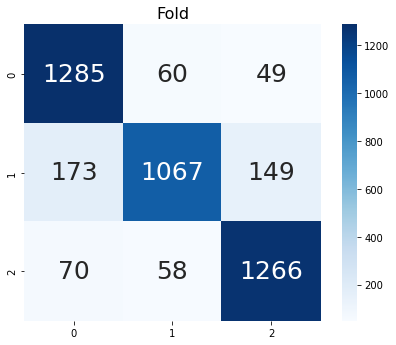

In [ ]:
import json
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm_cst_nb = confusion_matrix(label,label_pre)
plt.figure(figsize=(17,12))
# plt.suptitle('Confusion Matrix: XLM-R ', fontsize=20)

plt.subplot(2,2,1)
plt.title('Fold', fontsize=16)
df_cm_cst_nb = pd.DataFrame(cm_cst_nb)#, index=np.unique(cst_train), columns=np.unique(cst_test))
sns.heatmap(df_cm_cst_nb, annot=True, square=True, annot_kws={"size": 25}, fmt='2g', cmap='Blues')
    # print(classification_report(y_label, pred, digits = 4))
    
print('Evaluation result:\n')
print(classification_report(label, label_pre,digits=4))

#**Analysis**


## remove "bỏ"

In [ ]:
train = pd.read_json("/content/drive/MyDrive/VLSP2021/vlsp_2021_nli_train_data/vlsp_2021_nli_traindata_16200_pairs.json")

In [ ]:
train

,id,lang_1,lang_2,sentence_1,sentence_2,label
0,train_0,en,vi,Some Maine congressional leaders are pushing t...,Một số lãnh đạo quốc hội Maine đang tiến hành ...,neutral
1,train_1,vi,vi,Tờ báo Dispatch đã bày tỏ sự ủng hộ mạnh mẽ đố...,Thống đốc thứ 70 của bang Ohio - Mike DeWine l...,neutral
2,train_2,en,vi,"Dr. Roberto Colon, the associate chief medical...",Sau khi ghi nhận ca tử vong do virus corona đầ...,neutral
3,train_3,en,vi,Austin Regional Clinic is looking for 250 volu...,Các cuộc thử nghiệm vắc-xin ngừa virus corona ...,agree
4,train_4,vi,vi,Khi số ca nhiễm virus corona mới tăng trên khắ...,Indiana hiện đang rất nỗ lực để chiến đấu với ...,neutral
...,...,...,...,...,...,...
16195,train_16195,en,vi,Health officials Sunday announced three more c...,California là một trong những bang đi đầu tron...,neutral
16196,train_16196,en,vi,Gov. Chris Sununu said Tuesday that he is not ...,New Hampshire sẽ không áp đặt thêm lệnh hạn ch...,agree
16197,train_16197,vi,vi,Dữ liệu mới do Sở Y tế Công cộng Alabama công ...,"Theo thống kê của Sở Y tế Công cộng Alabama, q...",agree
16198,train_16198,vi,vi,Các quan chức y tế công cộng địa phương đang t...,Các quan chức y tế công cộng địa phương vẫn ch...,disagree


In [ ]:
df = pd.DataFrame(columns = ['id','lang_1','lang_2','sentence_1','sentence_2',"label"])

In [ ]:
df

,id,lang_1,lang_2,sentence_1,sentence_2,label


In [ ]:
for i in range(len(train)):
  if (len(train.sentence_1[i]) > 15 and len(train.sentence_2[i])>15):
    # print("id: " , test.id[i], "<<",test.sentence_1[i] + "<<" + test.sentence_2[i]+"<<" + test.label[i])
    # test.loc[len(test.sentence_1) < 15]
    df = df.append({'id':train.id[i],'lang_1':train.lang_1[i],'lang_2':train.lang_2[i],'sentence_1':train.sentence_1[i],"sentence_2":train.sentence_2[i],"label":train.label[i]}, ignore_index=True)

In [ ]:
df

,id,lang_1,lang_2,sentence_1,sentence_2,label
0,train_0,en,vi,Some Maine congressional leaders are pushing t...,Một số lãnh đạo quốc hội Maine đang tiến hành ...,neutral
1,train_1,vi,vi,Tờ báo Dispatch đã bày tỏ sự ủng hộ mạnh mẽ đố...,Thống đốc thứ 70 của bang Ohio - Mike DeWine l...,neutral
2,train_2,en,vi,"Dr. Roberto Colon, the associate chief medical...",Sau khi ghi nhận ca tử vong do virus corona đầ...,neutral
3,train_3,en,vi,Austin Regional Clinic is looking for 250 volu...,Các cuộc thử nghiệm vắc-xin ngừa virus corona ...,agree
4,train_4,vi,vi,Khi số ca nhiễm virus corona mới tăng trên khắ...,Indiana hiện đang rất nỗ lực để chiến đấu với ...,neutral
...,...,...,...,...,...,...
16171,train_16195,en,vi,Health officials Sunday announced three more c...,California là một trong những bang đi đầu tron...,neutral
16172,train_16196,en,vi,Gov. Chris Sununu said Tuesday that he is not ...,New Hampshire sẽ không áp đặt thêm lệnh hạn ch...,agree
16173,train_16197,vi,vi,Dữ liệu mới do Sở Y tế Công cộng Alabama công ...,"Theo thống kê của Sở Y tế Công cộng Alabama, q...",agree
16174,train_16198,vi,vi,Các quan chức y tế công cộng địa phương đang t...,Các quan chức y tế công cộng địa phương vẫn ch...,disagree


In [ ]:
import pandas as pd
# df.to_csv("/content/drive/MyDrive/VLSP2021/Data_new/train_data.csv")
# train = pd.read_csv("/content/drive/MyDrive/VLSP2021/Data_new/train_data.csv")
test = pd.read_csv("/content/drive/MyDrive/VLSP2021/Data_new/test-vi-vi - test_gold_4177.csv")

In [ ]:
pd.label = pd.label.map({'agree':0,'disagree':2,'neutral':1})

In [ ]:
test

,Unnamed: 0,id,sentence_1,sentence_2,label
0,0,test_0,Thống đốc Lamont đã thông báo vào chiều thứ Nă...,"Chiều thứ Năm, Thống đốc Lamont tuyên bố kích ...",agree
1,1,test_1,Với các bác sĩ và y tế chiến đấu với một đại d...,"Trong những ngày phải đối phó với COVID-19, cá...",disagree
2,2,test_2,Hành khách đến New Zealand sẽ phải dừng lại ở ...,Những người nhập cảnh vào New Zealand không ph...,disagree
3,3,test_3,"Nghiên cứu trên 560 người lớn khỏe mạnh, trong...",Vắc-xin an toàn và tạo ra phản ứng miễn dịch t...,agree
4,4,test_4,Researchers in Finland made a computer-simulat...,Một mô hình đã thể hiện được cách thức virus l...,agree
...,...,...,...,...,...
4172,4172,test_4195,"New York Gov. Andrew Cuomo, who has emerged as...",Thống đốc New York Andrew Cuomo đã đôn đáo tìm...,neutral
4173,4173,test_4196,The South Carolina Department of Health and En...,Đã có thêm hơn 700 trường hợp mắc COVID-19 đượ...,agree
4174,4174,test_4197,New Jersey announced Wednesday it is leaving w...,Bang New Jersey vẫn áp dụng những nội dung khu...,disagree
4175,4175,test_4198,The Vermont Agency of Education has amended it...,Bang Vermont đã quyết định giữ nguyên hướng dẫ...,disagree


## visualize

Importing the Libraries

In [ ]:
!pip install --quiet googletrans

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords
import time
from string import punctuation
from nltk.util import ngrams
from nltk import word_tokenize
from collections import Counter
from spacy import displacy
from googletrans import Translator
from tqdm import tqdm
from textblob import TextBlob
import warnings

warnings.filterwarnings('ignore')
trans = Translator()

     |████████████████████████████████| 55 kB 2.3 MB/s 
     |████████████████████████████████| 42 kB 1.6 MB/s 
     |████████████████████████████████| 1.3 MB 8.6 MB/s 
     |████████████████████████████████| 53 kB 2.4 MB/s 
     |████████████████████████████████| 65 kB 3.3 MB/s 


In [ ]:
train = pd.read_csv("/content/drive/MyDrive/VLSP2021/Data_new/train_data.csv")
# test =  pd.read_csv("/content/drive/MyDrive/VLSP2021/Data_new/test_gold_4177.csv")

In [ ]:
train

,Unnamed: 0,id,lang_1,lang_2,sentence_1,sentence_2,label
0,0,train_0,en,vi,Some Maine congressional leaders are pushing t...,Một số lãnh đạo quốc hội Maine đang tiến hành ...,neutral
1,1,train_1,vi,vi,Tờ báo Dispatch đã bày tỏ sự ủng hộ mạnh mẽ đố...,Thống đốc thứ 70 của bang Ohio - Mike DeWine l...,neutral
2,2,train_2,en,vi,"Dr. Roberto Colon, the associate chief medical...",Sau khi ghi nhận ca tử vong do virus corona đầ...,neutral
3,3,train_3,en,vi,Austin Regional Clinic is looking for 250 volu...,Các cuộc thử nghiệm vắc-xin ngừa virus corona ...,agree
4,4,train_4,vi,vi,Khi số ca nhiễm virus corona mới tăng trên khắ...,Indiana hiện đang rất nỗ lực để chiến đấu với ...,neutral
...,...,...,...,...,...,...,...
16171,16171,train_16195,en,vi,Health officials Sunday announced three more c...,California là một trong những bang đi đầu tron...,neutral
16172,16172,train_16196,en,vi,Gov. Chris Sununu said Tuesday that he is not ...,New Hampshire sẽ không áp đặt thêm lệnh hạn ch...,agree
16173,16173,train_16197,vi,vi,Dữ liệu mới do Sở Y tế Công cộng Alabama công ...,"Theo thống kê của Sở Y tế Công cộng Alabama, q...",agree
16174,16174,train_16198,vi,vi,Các quan chức y tế công cộng địa phương đang t...,Các quan chức y tế công cộng địa phương vẫn ch...,disagree


In [ ]:
test

Label Distribution

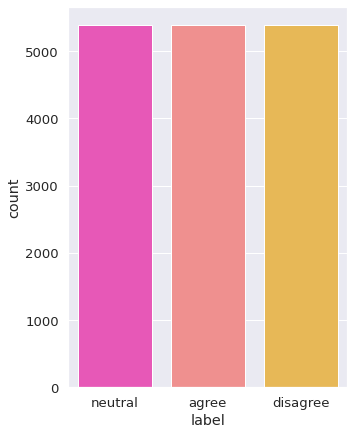

In [ ]:
# Label Distribution in the training dataset
plt.rcParams['figure.figsize'] = [5,7]
sns.set(style = 'darkgrid', font_scale = 1.2)
label_sns = sns.countplot(train['label'], palette = 'spring')

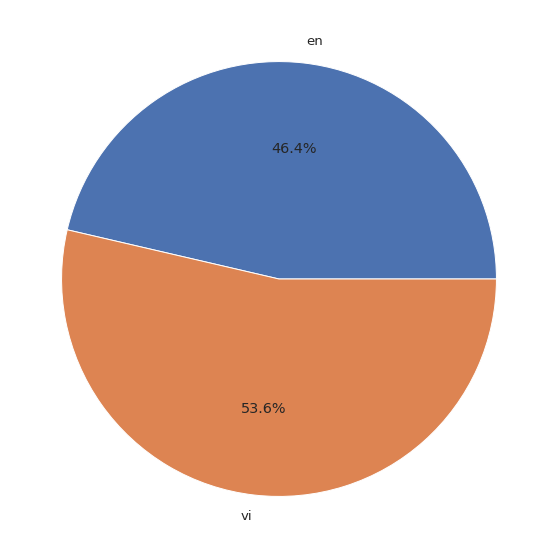

In [ ]:
labels, frequencies = np.unique(train.lang_1.values, return_counts = True)

plt.figure(figsize = (10,10))
plt.pie(frequencies,labels = labels, autopct = '%1.1f%%')
plt.show()

In [ ]:
train.label.value_counts()

disagree    5392
agree       5392
neutral     5392
Name: label, dtype: int64

word cloud

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words_en.append("và")

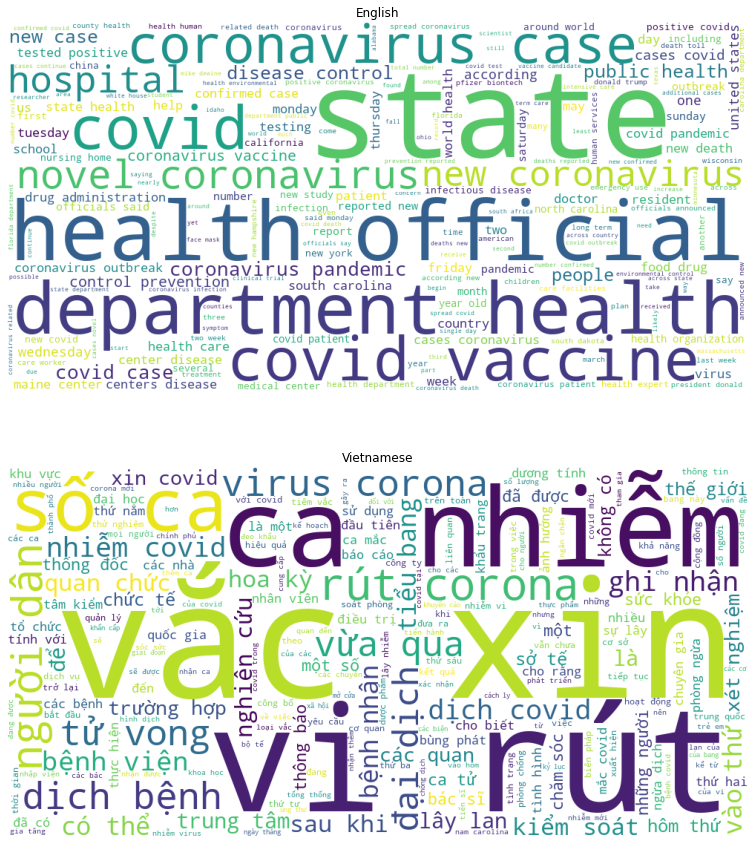

In [ ]:
# Word Cloud Representation for the sentences in English
fig, ax = plt.subplots(2, 1, figsize=(30, 15))
# stop_words_en = list(stopwords.words('english'))
# stop_words_en = list(stopwords.words('english'))

english_sent = train.loc[train.lang_1 == 'en', ['sentence_1', 'sentence_2']].copy()
english_sent['sentence_1'] = english_sent['sentence_1'].str.lower()
english_sent['sentence_2'] = english_sent['sentence_2'].str.lower()
# .str.lower()
# Removing the stopwords just for the visualization
english_sent['sentence_1'] = english_sent['sentence_1'].apply(lambda x: " ".join(word for word in x.split() if word not in stop_words_en))
english_sent['sentence_2'] = english_sent['sentence_2'].apply(lambda x: " ".join(word for word in x.split() if word not in stop_words_en))

text_hypo = (' '.join(english_sent['sentence_2']))
text = (' '.join(english_sent['sentence_1']))

# WORDCLOUD
cloud = WordCloud(width = 1000, height = 500, background_color = 'white').generate(text)
ax[0].axis("off")
ax[0].title.set_text("English")
ax[0].imshow(cloud)
time.sleep(0.01)

cloud_1 = WordCloud(width = 1000, height = 500, background_color = 'white').generate(text_hypo)
ax[1].axis("off")
ax[1].title.set_text("Vietnamese")
ax[1].imshow(cloud_1);

In [ ]:
text